Note: All of the model fits presented here have been pre-run using the script `fit_choice_models.py`. This can take a lot of time to run.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context('paper')


fig_size = (5.0, 2.5)

# Experiment 1

In [2]:
loo = pd.read_pickle('Data/model_fits/model_fits_exp_lin.pkl')
summary = pd.read_pickle('Data/model_fits/model_params_exp_lin_rbf_cls.pkl')
loo.rename(index={'Kalman w/SC':'Simple Kalman'}, inplace=True)

#note the "Simple Kalman" is modeled without sticky choice and wasn't included in the paper
loo.drop('Simple Kalman', inplace=True)
loo.drop('Scrambled', inplace=True)

# calculate chance
n = len(pd.read_csv('Data/exp_linear/rbfpred.csv')) # n_subj * n_trails_per_subj
n_arms = 8
chance_loo = -2 * n * np.log(1. / n_arms)

print "Chance: {}".format(chance_loo)

loo.sort_values('LOO', ascending=False, inplace=True)
loo['dLOO'] = loo.LOO - np.min(loo.LOO)
loo['LOO dLOO LOO_se'.split()]


Chance: 132252.482051


,LOO,dLOO,LOO_se
Sticky-Choice,74117.013931,22693.468864,457.742150
Lin-Reg,71422.248629,19998.703562,452.491382
Bayesian-GP,58137.534089,6713.989021,438.439840
GP-RBF,55814.695037,4391.149970,434.124566
Kalman,54757.107327,3333.562260,429.144697
Clustering,54121.496627,2697.951559,424.809565
Linear/Clustering,53652.000256,2228.455189,422.527828
GP-RBF/Kalman,53632.482207,2208.937139,425.894747
GP-RBF/Clustering,51423.545067,0.000000,424.499452


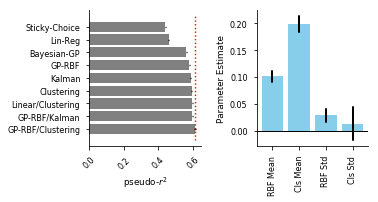

In [3]:
def plot_results(loo, summary, chance_loo, vars_=None, labels=None):
    _loo = loo.sort_values('LOO')
    _loo[r'pseudo-$r^2$'] = 1 - _loo.LOO / chance_loo
    _loo['r2_err'] = _loo.LOO_se / chance_loo
    fig, axes = plt.subplots(1, 2, figsize=fig_size, gridspec_kw=dict(wspace=0.5))
    ax = axes[0]
    min_r2 = np.max(_loo[r'pseudo-$r^2$'])
    with sns.axes_style('ticks'):
        plt.sca(ax)
        ax.barh(range(len(_loo[r'pseudo-$r^2$'].values)), 
                 _loo[r'pseudo-$r^2$'].values, color='grey', align='center')
        ax.set_yticks(range(len(_loo.LOO.values)))
        ax.set_yticklabels(_loo.index.tolist())
        ax.errorbar(y = range(len(_loo.LOO.values)), 
                    x = _loo[r'pseudo-$r^2$'].values,
                    xerr = _loo['r2_err'].values, linestyle='None',
                    color='k',
                   )
        xlb, xub = plt.gca().get_xlim()
        ylb, yub = plt.gca().get_ylim()

        ax.plot([min_r2, min_r2],[ylb, yub], 'r:')
        ax.set_xticks([0., 0.2, 0.4, 0.6])
        sns.despine()


        ax.set_xlabel(r'pseudo-$r^2$')
        plt.xticks(rotation=45)

        #### second plot
        ax = axes[1]
        plt.sca(ax)

        
        if vars_ is None:
            vars_  = ['mu_beta_rbf_mean', 'mu_beta_cls_mean', 
                      'mu_beta_rbf_stdv', 'mu_beta_cls_stdv',]
        if labels is None:
            labels = ['RBF Mean', 'Cls Mean', 'RBF Std', 'Cls Std']

        y = summary.loc[vars_, 'mean'].values
        plt.bar(range(4), y, color='skyblue')

        for ii, b in enumerate(vars_):
            ylb = summary.loc[b, 'hpd_2.5']
            yub = summary.loc[b, 'hpd_97.5']
            ax.plot([ii,ii], [ylb, yub], 'k', linewidth=2)
        plt.xticks(range(len(y)))
        ax.set_xticklabels(labels)

        ax.axhline(y=0, color='k', linewidth=1)

        plt.ylabel('Parameter Estimate')
        plt.xticks(rotation=90)
        ax.xaxis.label.set_visible(False)
        return fig

_ = plot_results(loo, summary, chance_loo)
plt.savefig('fig_model_fits_exp_linear.pdf', dpi=300, bbox_inches='tight')

# Experiment Change Point

In [4]:
loo = pd.read_pickle('Data/model_fits/model_fits_exp_cp.pkl')
summary = pd.read_pickle('Data/model_fits/model_params_exp_cp_rbf_cls.pkl')

# vars_  = ['mu_beta_lin_mean', 'mu_beta_cls_mean', 
#           'mu_beta_lin_stdv', 'mu_beta_cls_stdv',]
# labels = ['Lin Mean', 'Cls Mean', 'Lin Std', 'Cls Std']
            
# calculate chance
n = len(pd.read_csv('Data/exp_changepoint/changerbfpred.csv')) # n_subj * n_trails_per_subj
n_arms = 8
chance_loo = -2 * n * np.log(1. / n_arms)

print "Chance: {}".format(chance_loo)

loo.sort_values('LOO', ascending=False, inplace=True)
loo['dLOO'] = loo.LOO - np.min(loo.LOO)
loo['LOO dLOO LOO_se'.split()]

Chance: 163444.105176


,LOO,dLOO,LOO_se
Sticky-Choice,102276.618072,23921.019071,486.410436
Lin-Reg,101425.613110,23070.014110,484.558314
GP-RBF,87189.447312,8833.848311,473.710920
Bayesian-GP,83465.549982,5109.950982,462.814536
Kalman,82540.859890,4185.260889,485.059184
Clustering,81779.400685,3423.801684,481.802894
Linear/Clustering,81325.362616,2969.763616,479.926131
GP-RBF/Kalman,79682.879552,1327.280551,481.747704
GP-RBF/Clustering,78355.599000,0.000000,476.086496


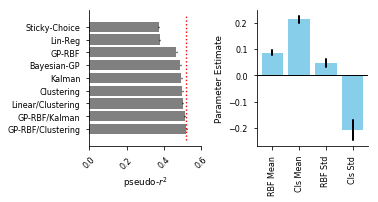

In [5]:
_ = plot_results(loo, summary, chance_loo)
plt.savefig('fig_model_fits_exp_cp.pdf', dpi=300, bbox_inches='tight')

# Experiment Scrambled

In [6]:
loo = pd.read_pickle('Data/model_fits/model_fits_exp_scram.pkl')
summary = pd.read_pickle('Data/model_fits/model_params_exp_scram_rbf_cls.pkl')
loo.rename(index={'Kalman w/SC':'Simple Kalman'}, inplace=True)

#note the "Simple Kalman" is modeled without sticky choice and wasn't included in the paper
loo.drop('Simple Kalman', inplace=True)
loo.drop('Scrambled', inplace=True)

# calculate chance
n = len(pd.read_csv('Data/exp_scrambled/gprbfscrambled.csv')) # n_subj * n_trails_per_subj
n_arms = 8
chance_loo = -2 * n * np.log(1. / n_arms)

print "Chance: {}".format(chance_loo)

loo.sort_values('LOO', ascending=False, inplace=True)
loo['dLOO'] = loo.LOO - np.min(loo.LOO)
loo['LOO dLOO LOO_se'.split()]

Chance: 102308.523851


,LOO,dLOO,LOO_se
Sticky-Choice,61623.540831,17825.538563,392.600549
Lin-Reg,59843.580073,16045.577805,389.632792
GP-RBF,47515.709879,3717.707611,384.791200
Bayesian-GP,47438.683217,3640.680950,383.125824
Clustering,45595.940702,1797.938434,378.727403
Linear/Clustering,45248.992712,1450.990444,377.569572
Kalman,44355.167170,557.164902,375.373361
GP-RBF/Clustering,43858.175944,60.173677,377.763555
GP-RBF/Kalman,43798.002267,0.000000,378.292263


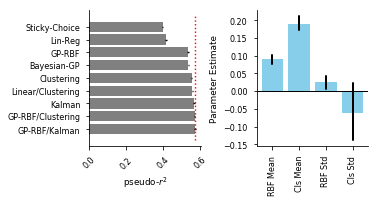

In [7]:
_ = plot_results(loo, summary, chance_loo)
plt.savefig('fig_model_fits_exp_scrambled.pdf', dpi=300, bbox_inches='tight')

# Experiment Shifted

In [8]:
loo = pd.read_pickle('Data/model_fits/model_fits_exp_shifted.pkl')
summary = pd.read_pickle('Data/model_fits/model_params_exp_shifted_rbf_cls.pkl')
loo.rename(index={'Kalman w/SC':'Simple Kalman'}, inplace=True)

#note the "Simple Kalman" is modeled without sticky choice and wasn't included in the paper
loo.drop('Scrambled', inplace=True)

# calculate chance
n = len(pd.read_csv('Data/exp_shifted/gprbfshifted.csv')) # n_subj * n_trails_per_subj
n_arms = 8
chance_loo = -2 * n * np.log(1. / n_arms)

print "Chance: {}".format(chance_loo)

loo.sort_values('LOO', ascending=False, inplace=True)
loo['dLOO'] = loo.LOO - np.min(loo.LOO)
loo['LOO dLOO LOO_se'.split()]

Chance: 163444.105176


,LOO,dLOO,LOO_se
Sticky-Choice,120859.072811,27308.598199,430.277644
Lin-Reg,115895.964440,22345.489829,444.243539
Bayesian-GP,109823.165807,16272.691195,457.807441
Kalman,109613.762119,16063.287507,459.350548
Clustering,103176.607294,9626.132682,467.884898
GP-RBF,101631.696967,8081.222356,471.337316
Linear/Clustering,100949.175983,7398.701372,468.220908
GP-RBF/Kalman,98830.526410,5280.051799,472.622342
GP-RBF/Clustering,93550.474611,0.000000,477.185323


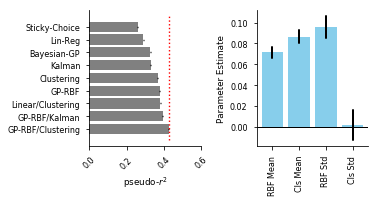

In [9]:
_ = plot_results(loo, summary, chance_loo)
plt.savefig('fig_model_fits_exp_shifted.pdf', dpi=300, bbox_inches='tight')

# Experiment SRS

In [10]:
loo = pd.read_pickle('Data/model_fits/model_fits_exp_srs.pkl')
summary = pd.read_pickle('Data/model_fits/model_params_exp_srs_rbf_cls.pkl')

#note the "Simple Kalman" is modeled without sticky choice and wasn't included in the paper
loo.drop('Scrambled', inplace=True)


# calculate chance
n = len(pd.read_csv('Data/exp_srs/gprbfsrs.csv')) # n_subj * n_trails_per_subj
n_arms = 8
chance_loo = -2 * n * np.log(1. / n_arms)

print "Chance: {}".format(chance_loo)

loo.sort_values('LOO', ascending=False, inplace=True)
loo['dLOO'] = loo.LOO - np.min(loo.LOO)
loo['LOO dLOO LOO_se'.split()]

Chance: 140986.136526


,LOO,dLOO,LOO_se
Sticky-Choice,88261.808536,24670.740192,452.377869
Lin-Reg,86065.490931,22474.422586,451.208158
Bayesian-GP,69447.723773,5856.655429,450.577691
GP-RBF,68376.396843,4785.328499,449.838894
Clustering,66262.397727,2671.329383,444.585014
Linear/Clustering,65932.360612,2341.292268,443.335323
Kalman,65121.517049,1530.448705,441.186982
GP-RBF/Kalman,64290.905294,699.836950,440.729319
GP-RBF/Clustering,63591.068344,0.000000,443.057297


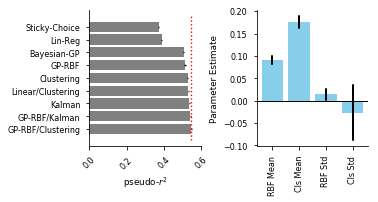

In [11]:
_ = plot_results(loo, summary, chance_loo)
plt.savefig('fig_model_fits_exp_srs.pdf', dpi=300, bbox_inches='tight')

In [12]:
np.log2(np.exp(1.5/-2))

-1.0820212806667227

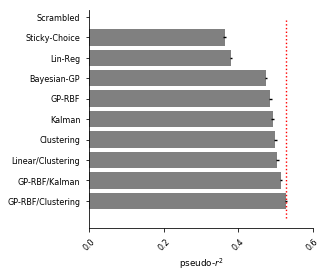

In [13]:
loo = pd.read_pickle('Data/model_fits/model_fits_exp_cp.pkl') \
 + pd.read_pickle('Data/model_fits/model_fits_exp_srs.pkl') \
 + pd.read_pickle('Data/model_fits/model_fits_exp_lin.pkl') \
 + pd.read_pickle('Data/model_fits/model_fits_exp_scram.pkl') \
 + pd.read_pickle('Data/model_fits/model_fits_exp_shifted.pkl')
loo.sort_values('LOO', ascending=False, inplace=True)

#note the "Simple Kalman" is modeled without sticky choice and wasn't included in the paper
loo.drop('Kalman w/SC', inplace=True)



n = len(pd.read_csv('Data/exp_srs/gprbfsrs.csv')) \
    + len(pd.read_csv('Data/exp_shifted/gprbfshifted.csv')) \
    + len(pd.read_csv('Data/exp_scrambled/gprbfscrambled.csv')) \
    + len(pd.read_csv('Data/exp_changepoint/changerbfpred.csv')) \
    + len(pd.read_csv('Data/exp_linear/rbfpred.csv'))
# n_subj * n_trails_per_subj
n_arms = 8
chance_loo = -2 * n * np.log(1. / n_arms)

_loo = loo.sort_values('LOO')
_loo[r'pseudo-$r^2$'] = 1 - _loo.LOO / chance_loo
_loo['r2_err'] = _loo.LOO_se / chance_loo
fig, ax =  plt.subplots(1, 1, figsize=(4, 4), gridspec_kw=dict(wspace=0.5))
min_r2 = np.max(_loo[r'pseudo-$r^2$'])
with sns.axes_style('ticks'):
    plt.sca(ax)
    ax.barh(range(len(_loo[r'pseudo-$r^2$'].values)), 
             _loo[r'pseudo-$r^2$'].values, color='grey', align='center')
    ax.set_yticks(range(len(_loo.LOO.values)))
    ax.set_yticklabels(_loo.index.tolist())
    ax.errorbar(y = range(len(_loo.LOO.values)), 
                x = _loo[r'pseudo-$r^2$'].values,
                xerr = _loo['r2_err'].values, linestyle='None',
                color='k',
               )
    xlb, xub = plt.gca().get_xlim()
    ylb, yub = plt.gca().get_ylim()

    ax.plot([min_r2, min_r2],[ylb, yub], 'r:')
    ax.set_xticks([0., 0.2, 0.4, 0.6])
    sns.despine()


    ax.set_xlabel(r'pseudo-$r^2$')
    plt.xticks(rotation=45)

    